In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# MNIST 데이터셋 불러오기
mnist = keras.datasets.mnist

In [5]:
# MNIST 데이터셋 학습용(x,y), 테스트용(x,y)으로 나누기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 8s 1us/step


In [21]:
#학습용 데이터 형태 살펴보기
x_train.shape

(60000, 28, 28)

In [22]:
#학습용 첫 번째 데이터 살펴보기1
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
#학습용 첫 번째 데이터 살펴보기2
for x in x_train[0]:
    for i in x:
        print('{:3}'.format(i), end = '')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [13]:
#첫 번째 데이터 실제 숫자
y_train[0]

5

In [14]:
#데이터 전처리(0 ~ 1 사이 숫자로)
#딥러닝 모델의 성능은 0 ~ 1 사이의 데이터에서 성능 좋아짐
x_train = x_train / 255
x_test = x_test / 255

In [15]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
#모델 만들기 : 입력층(784) - 은닉층1(256) - 은닉층2(128) - 은닉층3(64) - 출력층(10)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax') # 각각의 확률을 출력
])

In [17]:
#모델 컴파일 : 최적화 함수, 손실 함수 설정 + 평가 지표 설정 + 가중치 초기화
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [18]:
#모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [23]:
#모델 학습 : 전제 데이터는 5번 반복(문제와 정답을 한 세트로)
model.fit(x_train, y_train, epochs = 5)# 학습 5번 반복

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0331 - accuracy: 0.9893
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0293 - accuracy: 0.9909
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0226 - accuracy: 0.9924
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0219 - accuracy: 0.9930
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0189 - accuracy: 0.9937


In [24]:
# 모델 평가
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0949 - accuracy: 0.9781


[0.0949028953909874, 0.9781000018119812]

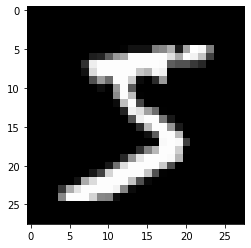

In [25]:
# 예측 - 0번째 숫자 이미지로 보기
plt.imshow(x_train[0], cmap = 'gray')
plt.show()

In [26]:
#예측 - 0번째 숫자 예측하기1
print(model.predict(x_train[0].reshape(1,28,28)))

[[2.78583987e-19 2.64342625e-16 1.15474575e-20 3.87154842e-08
  5.51144061e-21 1.00000000e+00 1.83137616e-16 2.69453373e-17
  4.22650409e-16 1.86849819e-12]]


In [27]:
#예측- 0번째 숫자 예측하기2(with numpy)
print(np.argmax(model.predict(x_train[0].reshape(1,28,28))))

5
